# Problem:
<p> Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.</p>


# Goal:

<p>Your goal is to develop a predictive model for whether an account will default next month, given
    demographics and historical data.You will developed the practical application of the model.<p>

In [1]:
# Importing modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data sets
data = pd.read_csv("./Task 1 Data set/cleaned_data.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
data.columns # Name of all the columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
# Getting all nonzero elements from 'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6' and storing it into df
columns=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df = data.replace(0, np.nan).dropna(axis=0, how='any', subset=columns).replace(np.nan,0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,university,0.0,0.0,0.0,1.0
9,62a2fd79-cd90,20000,1,3,2,35,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,1122.0,0.0,0.0,high school,0.0,1.0,0.0,0.0
11,4777689a-5131,260000,2,1,2,51,-1.0,-1.0,-1.0,-1.0,...,8583.0,22301.0,0.0,3640.0,0.0,graduate school,1.0,0.0,0.0,0.0
17,cb258690-8ea2,360000,2,1,1,49,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,graduate school,1.0,0.0,0.0,0.0
18,f6f0307a-b75f,180000,2,1,2,29,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,graduate school,1.0,0.0,0.0,0.0


In [22]:
# Logarithmic Transformation and droping Nan Values
df['pay_1']=df['PAY_1'].apply(lambda x:np.log(x))
df['pay_2']=df['PAY_2'].apply(lambda x:np.log(x))
df['pay_3']=df['PAY_3'].apply(lambda x:np.log(x))
df['pay_4']=df['PAY_4'].apply(lambda x:np.log(x))
df['pay_5']=df['PAY_5'].apply(lambda x:np.log(x))
df['pay_6']=df['PAY_6'].apply(lambda x:np.log(x))
df.dropna(inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,graduate school,high school,others,university,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
57,b4abe25a-789d,50000,1,1,2,29,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
83,174c412f-2d17,200000,1,1,1,53,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
103,cc332450-5380,280000,1,2,1,41,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612
111,46c75da5-bfd0,50000,1,3,2,37,2.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147
145,9c0c1a78-0018,210000,1,3,1,45,2.0,3.0,4.0,4.0,...,0.0,1.0,0.0,0.0,0.693147,1.098612,1.386294,1.386294,1.609438,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,cd41e0dd-2b14,100000,1,2,2,44,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
26573,68a17b67-2553,70000,1,3,1,45,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
26641,8dea83fa-2f50,40000,1,2,2,47,2.0,2.0,3.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147
26655,46c706d6-6aef,210000,1,2,1,34,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147


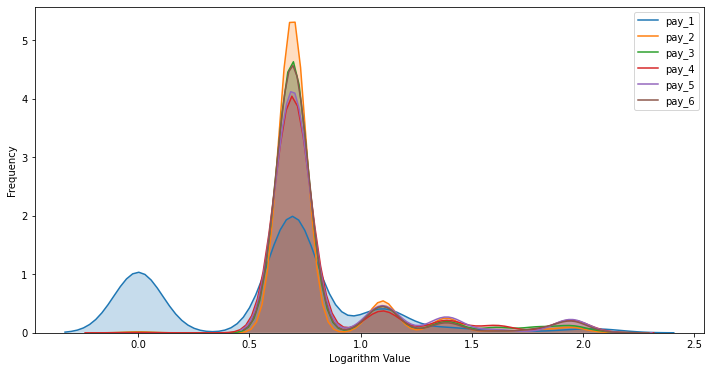

In [21]:
#pl
plt.figure(figsize=(12,6))
sns.kdeplot(data=df['pay_1'], shade=True)
sns.kdeplot(data=df['pay_2'], shade=True)
sns.kdeplot(data=df['pay_3'], shade=True)
sns.kdeplot(data=df['pay_4'], shade=True)
sns.kdeplot(data=df['pay_5'], shade=True)
sns.kdeplot(data=df['pay_6'], shade=True)
plt.legend()
plt.xlabel('Logarithm Value');
plt.ylabel("Frequency");